In [1]:

import os
import json
import glob
import copy
import numpy as np
import pylab as pl
import seaborn as sns
import pandas as pd


from scipy import stats as spstats

from pipeline.python.classifications import experiment_classes as util
from pipeline.python.utils import natural_keys, label_figure

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
   

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/retinotopy/target_visual_field.py:19: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app

In [2]:
%matplotlib notebook

# Select data

## IGNORE THESE:
##### V1:  JC076-20190501, JC083-20190510
    - if rfs only, ignore: JC083-20190510, JC083-20190511, 
    
    - if blobs & rfs only, ignore: JC083_20190510, JC083-20190511
    
    - if ALL stimuli, ignore: JC083-20190507, JC083-20190510, 
    
#### Lm:  JC078-20190509, JC080-20190506, JC083-20190517
    - if rfs only, ignore: JC078-20190504, JC078-2019513, 
                           JC083-20190512

    - if blobs & rfs: ignore: JC078-20190426, JC078-2019513
                              JC083-20190512
                              
    - if ALL stimuli, ignore: JC078-20190430, JC078-20190426, JC078-20190504
                              JC083-20190508
#### Li:  JC076-20190422, JC099-20190509, JC091-20190607, JC091-20190606
    

In [3]:
always_exclude = ['JC076-20190501', 'JC083-20190510', 
                  'JC078-20190509', 'JC080-20190506', 'JC083-20190517',
                 'JC076-20190422', 'JC099-20190509', 'JC091-20190607', 'JC091-20190606']

also_exclude = ['JC083-20190510', 'JC083-20190511', 
                'JC078-20190504', 'JC078-2019513',
                'JC083-20190512']

excluded_sessions = copy.copy(always_exclude)
excluded_sessions.extend(also_exclude)
print(len(excluded_sessions))

14


# Set responsivity params

In [4]:
responsive_test = None
responsive_thr = None
n_stds = None
experiment_type = 'rfs'

# Get aggregate data

In [5]:
from pipeline.python.classifications import get_dataset_stats as gd
import cPickle as pkl

options = ['-t', 'traces001']
optsE = gd.extract_options(options)

rootdir = optsE.rootdir
aggregate_dir = optsE.aggregate_dir
fov_type = optsE.fov_type
traceid = optsE.traceid
response_type = 'dff'
print aggregate_dir

/n/coxfs01/julianarhee/aggregate-visual-areas


/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/get_dataset_stats.py:17: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/juliana

In [6]:
sdata_fpath = os.path.join(aggregate_dir, 'dataset_info.pkl')
if os.path.exists(sdata_fpath):
    with open(sdata_fpath, 'rb') as f:
        sdata = pkl.load(f)
else:
    sdata = gd.aggregate_session_info(traceid=optsE.traceid, trace_type=optsE.trace_type, 
                                       state=optsE.state, fov_type=optsE.fov_type, 
                                       visual_areas=optsE.visual_areas,
                                       blacklist=optsE.blacklist, 
                                       rootdir=optsE.rootdir)
    with open(sdata_fpath, 'wb') as f:
        pkl.dump(sdata, f, protocol=pkl.HIGHEST_PROTOCOL)


In [7]:
stats_desc = util.get_stats_desc(traceid=optsE.traceid,
                                      trace_type= optsE.trace_type,
                                      response_type = response_type,
                                      responsive_test = responsive_test,
                                      responsive_thr = responsive_thr,
                                      n_stds = n_stds)
print(stats_desc)

stats-traces001-corrected-dff-all


In [8]:
dsets = sdata[sdata['experiment'].isin(['rfs', 'rfs10'])] #experiment_type]

# Create output dir for analysis


In [9]:
from pipeline.python.retinotopy import fit_2d_rfs as fitrf

In [10]:
fit_desc = fitrf.get_fit_desc(response_type=response_type)
print fit_desc

fit-2dgaus_dff-no-cutoff


In [11]:
outdir = os.path.join(aggregate_dir, 'receptive-fields', '%s-%s' % (traceid, fit_desc), 'scatter')
if not os.path.exists(outdir):
    os.makedirs(outdir)
print(outdir)

/n/coxfs01/julianarhee/aggregate-visual-areas/receptive-fields/traces001-fit-2dgaus_dff-no-cutoff/scatter


In [12]:
def reformat_morph_values(sdf):
    control_ixs = sdf[sdf['morphlevel']==-1].index.tolist()
    sizevals = np.array([round(s, 1) for s in sdf['size'].unique() if s not in ['None', None] and not np.isnan(s)] )
    sdf.loc[sdf.morphlevel==-1, 'size'] = pd.Series(sizevals, index=control_ixs)
    sdf['size'] = [round(s, 1) for s in sdf['size'].values]

    return sdf


In [13]:
# Set plotting params
threshold_dff = False
min_dff = 0.03
cmap = 'inferno'


In [14]:
def get_rfdata(sdata, fit_desc=None, excluded_sessions=[]):
    assert fit_desc is not None, "No fit-desc specified!"
    
    rfdata = sdata[sdata['experiment'].isin(['rfs', 'rfs10'])]
    for skey in excluded_sessions:
        animalid, session = skey.split('-')
        drop_ixs = rfdata[(rfdata['animalid']==animalid) & (rfdata['session']==session)].index.tolist()
        rfdata= rfdata.drop(drop_ixs)
            
    fit_these = []
    dpaths = {}
    unknown = []
    for (visual_area, animalid, session, fov), g in rfdata.groupby(['visual_area', 'animalid', 'session', 'fov']): #animalid in rfdata['animalid'].unique():
        skey = '-'.join([animalid, session])
        if skey in excluded_sessions:
            continue

        rfruns = g['experiment'].unique()

        for rfname in rfruns:
            if int(session) < 20190511:
                fpath = glob.glob(os.path.join(rootdir, animalid, session, '*%s' % fov, 
                                            'combined_gratings*', 'traces', '%s*' % traceid, 
                                            'receptive_fields', fit_desc, 'fit_results.pkl'))
            else:
                fpath = glob.glob(os.path.join(rootdir, animalid, session, '*%s' % fov, 
                                            'combined_%s_*' % rfname, 'traces', '%s*' % traceid, 
                                            'receptive_fields', fit_desc, 'fit_results.pkl'))
            if len(fpath) > 0:
                assert len(fpath)==1, "TOo many paths: %s" % str(fpath)
                dpaths['-'.join([animalid, session, fov, rfname])] = fpath[0]
                
            elif len(f) == 0:
                fit_these.append((animalid, session, fov, rfname))
            else:
                unknown.append((animalid, session, fov, rfname))
    nostats = []
    for (animalid, session, fov, run_name) in fit_these:
        nostats = resp.visualize_session_stats(animalid, session, fov, altdir=aggregate_session_dir, create_new=True)

    
    print ("N dpaths: %i, N unfit: %i, N unknown: %i" % (len(dpaths), len(fit_these), len(unknown)))
    print("N datasets included: %i, N sessions excluded: %i" % (rfdata.shape[0], len(excluded_sessions)))
    #assert (len(dpaths) + len(fit_these) + len(unknown)) == rfdata.shape[0] - len(excluded_sessions), "There are dsets unaccounted for..."
    
    rfdata = rfdata.reset_index()
    fillpaths = ['' for _ in range(rfdata.shape[0])]
    for skey, fpath in dpaths.items():
        animalid, session, fov, rfname = skey.split('-')
        df_ix = rfdata[ (rfdata['animalid']==animalid) \
                           & (rfdata['session']==session) \
                           & (rfdata['fov']==fov) \
                           & (rfdata['experiment']==rfname)].index.tolist()[0]
        fillpaths[df_ix] = fpath
        
    rfdata['path'] = fillpaths
    
    return rfdata, nostats

In [15]:
rfdata, nostats = get_rfdata(sdata, fit_desc=fit_desc, excluded_sessions=excluded_sessions)

N dpaths: 30, N unfit: 0, N unknown: 0
N datasets included: 30, N sessions excluded: 14


In [16]:
rfdata.head()

,index,animalid,experiment,fov,session,visual_area,exp_no,animal_no,path
0,0,JC084,rfs,FOV1_zoom2p0x,20190522,V1,3,4,/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0...
1,4,JC084,rfs,FOV1_zoom2p0x,20190525,Lm,3,4,/n/coxfs01/2p-data/JC084/20190525/FOV1_zoom2p0...
2,8,JC091,rfs,FOV1_zoom2p0x,20190627,Lm,3,7,/n/coxfs01/2p-data/JC091/20190627/FOV1_zoom2p0...
3,16,JC091,rfs10,FOV1_zoom2p0x,20190614,Li,4,7,/n/coxfs01/2p-data/JC091/20190614/FOV1_zoom2p0...
4,24,JC091,rfs,FOV1_zoom2p0x,20190602,Li,3,7,/n/coxfs01/2p-data/JC091/20190602/FOV1_zoom2p0...


In [17]:
rfdata.iloc[0]['path']

'/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_rfs_static/traces/traces001_b78b04_traces001_5c60f6_traces001_7a5ecd_traces001_c80ac8_traces001_656bda_traces001_f17a03/receptive_fields/fit-2dgaus_dff-no-cutoff/fit_results.pkl'

# Select dataset

In [18]:
rootdir = '/n/coxfs01/2p-data'
animalid = 'JC084' #'JC059'
session = '20190522' #'20190227'
fov = 'FOV1_zoom2p0x' #'FOV4_zoom4p0x'
traceid = 'traces001' #'traces001'
response_type = 'dff'


In [19]:
devpath = glob.glob(os.path.join(rootdir, animalid, session, fov, 'combined_*', 
                       'traces', '%s*' % traceid, 'receptive_fields', fit_desc, 'evaluation', 'deviants.json'))[0]
with open(devpath, 'r') as f:
    d = json.load(f)


In [20]:
g['path'].values[0]

NameError: name 'g' is not defined

In [21]:
rfdata[rfdata['animalid']=='JC080']

,index,animalid,experiment,fov,session,visual_area,exp_no,animal_no,path
25,95,JC080,rfs,FOV1_zoom2p0x,20190603,Lm,3,2,/n/coxfs01/2p-data/JC080/20190603/FOV1_zoom2p0...
26,103,JC080,rfs10,FOV2_zoom2p0x,20190602,Lm,4,2,/n/coxfs01/2p-data/JC080/20190602/FOV2_zoom2p0...
27,105,JC080,rfs10,FOV1_zoom2p0x,20190602,Li,4,2,/n/coxfs01/2p-data/JC080/20190602/FOV1_zoom2p0...


In [22]:
missing_rfs = []
dlist = []
for (visual_area, animalid, session, fov), g in rfdata.groupby(['visual_area', 'animalid', 'session', 'fov']):
    skey = '-'.join([visual_area, animalid, session, fov])
    #print skey
    devpath = os.path.join( os.path.split(g['path'].values[0])[0], 'evaluation', 'deviants.json')
    if not os.path.exists(devpath):
        missing_rfs.append(devpath)
        continue
    else:
        with open(devpath, 'r') as f:
            d = json.load(f)

    dev_list = [('azimuth', i) for i in d['azimuth']]
    dev_list.extend( [('elevation', i) for i in d['elevation']] )
    dev_list.extend([('pass', i) for i in d['pass_rois']])
    tmpd = pd.DataFrame({'condition': [c[0] for c in dev_list],
                         'cell': [c[1] for c in dev_list],
                         'visual_area': [visual_area for _ in range(len(dev_list))],
                         'animalid': [animalid for _ in range(len(dev_list))],
                         'session': [session for _ in range(len(dev_list))],
                         'fov': [fov for _ in range(len(dev_list))]})
    
    dlist.append(tmpd)
    

In [23]:
print(len(missing_rfs))

1


In [24]:
for f in missing_rfs:
    print f.split('/traces/')[0]

/n/coxfs01/2p-data/JC080/20190602/FOV1_zoom2p0x/combined_rfs10_static


In [25]:
print(len(dlist))

25


In [26]:
df = pd.concat(dlist, axis=0).reset_index(drop=True)


In [27]:
df.groupby(['visual_area', 'condition']).count()['cell']

visual_area  condition
Li           azimuth      120
             elevation     93
             pass         165
Lm           azimuth      144
             elevation    139
             pass         238
V1           azimuth      190
             elevation    167
             pass         611
Name: cell, dtype: int64

In [28]:
visual_areas = ['V1', 'Lm', 'Li']
colors = ['k', 'royalblue', 'darkorange'] #sns.color_palette(palette='colorblind') #, n_colors=3)
area_colors = {'V1': colors[0], 'Lm': colors[1], 'Li': colors[2]}

In [29]:
df['ratio'] = [0 for _ in range(df.shape[0])]

In [30]:
#ratios = dict((visual_area, {'azimuth': [], 'elevation': []}) for visual_area in visual_areas)
for condition in ['azimuth', 'elevation']:
    for k, g in df.groupby(['visual_area', 'animalid', 'session', 'fov']):
        npass = len(g[g['condition']=='pass'])
        nbad = len(g[g['condition']==condition])
        frac = float(nbad)/npass
        df.loc[g.index, 'ratio'] = [frac for _ in range(g.shape[0])]
        #g['fraction'] = [frac for _ in range(g.shape[0])]
        
        #ratios[k[0]][condition].append(float(nbad)/npass)
        
        

In [31]:
df

,animalid,cell,condition,fov,session,visual_area,ratio
0,JC076,7,azimuth,FOV1_zoom2p0x,20190502,Li,0.300000
1,JC076,11,azimuth,FOV1_zoom2p0x,20190502,Li,0.300000
2,JC076,120,azimuth,FOV1_zoom2p0x,20190502,Li,0.300000
3,JC076,135,azimuth,FOV1_zoom2p0x,20190502,Li,0.300000
4,JC076,176,azimuth,FOV1_zoom2p0x,20190502,Li,0.300000
5,JC076,177,azimuth,FOV1_zoom2p0x,20190502,Li,0.300000
6,JC076,179,azimuth,FOV1_zoom2p0x,20190502,Li,0.300000
7,JC076,181,azimuth,FOV1_zoom2p0x,20190502,Li,0.300000
8,JC076,187,azimuth,FOV1_zoom2p0x,20190502,Li,0.300000
9,JC076,196,azimuth,FOV1_zoom2p0x,20190502,Li,0.300000


In [32]:
for k, g in df[df['visual_area']=='Li'].groupby(['animalid', 'session']):
    print k

('JC076', '20190502')
('JC090', '20190605')
('JC091', '20190602')
('JC091', '20190614')
('JC099', '20190609')
('JC099', '20190612')
('JC099', '20190617')


<IPython.core.display.Javascript object>


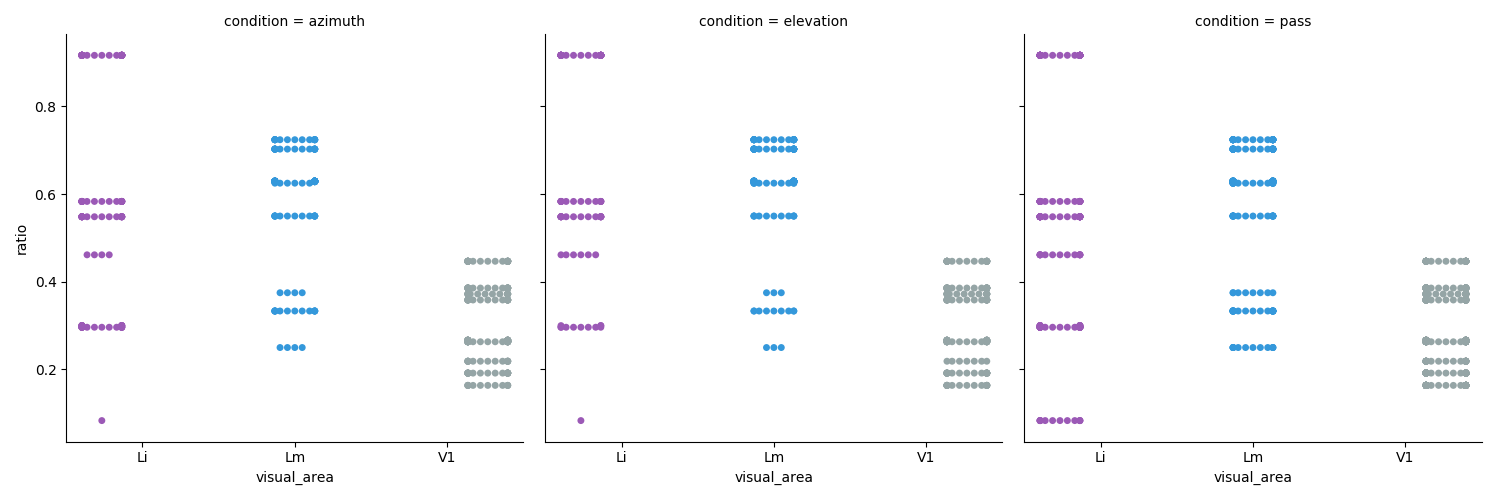

In [33]:
sns.catplot(x='visual_area', y='ratio', col='condition', hue='visual_area', data=df, \
            kind='swarm', dodge=True)

In [74]:
fracs_by_area = dict((visual_area, g.groupby(['animalid', 'session', 'fov'])['ratio'].unique().values.astype(float))\
                     for visual_area, g in df[df['condition']=='azimuth'].groupby(['visual_area']))
                     

In [75]:
df.head()

,animalid,cell,condition,fov,session,visual_area,ratio
0,JC076,7,azimuth,FOV1_zoom2p0x,20190502,Li,0.3
1,JC076,11,azimuth,FOV1_zoom2p0x,20190502,Li,0.3
2,JC076,120,azimuth,FOV1_zoom2p0x,20190502,Li,0.3
3,JC076,135,azimuth,FOV1_zoom2p0x,20190502,Li,0.3
4,JC076,176,azimuth,FOV1_zoom2p0x,20190502,Li,0.3


In [94]:
outdir

'/n/coxfs01/julianarhee/aggregate-visual-areas/receptive-fields/traces001-fit-2dgaus_dff-no-cutoff/scatter'

<IPython.core.display.Javascript object>


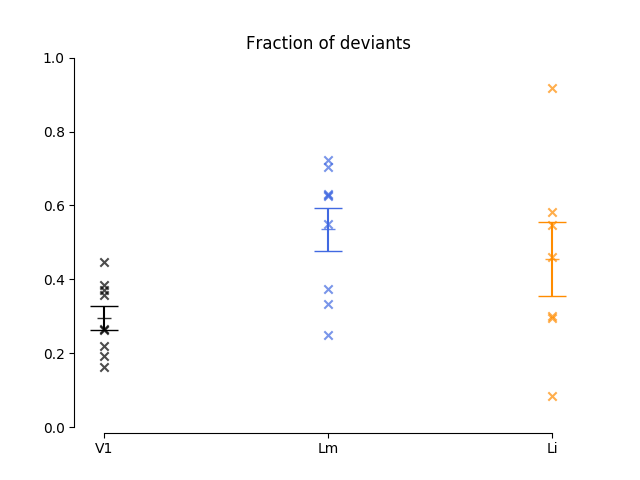

In [95]:
fig, ax = pl.subplots()

for vi, visual_area in enumerate(visual_areas):
    values = fracs_by_area[visual_area]
    ax.scatter([vi for _ in range(len(values))], values,  marker='x', color=area_colors[visual_area], alpha=0.7)
              #edgecolor=area_colors[visual_area], facecolor='none')
    ax.plot(vi, values.mean(), marker='_', color=area_colors[visual_area], markersize=10, alpha=0.8)
    ax.errorbar(vi, values.mean(), yerr=spstats.sem(values), ecolor=area_colors[visual_area], capsize=10)
    #sns.boxplot(x=[vi for _ in range(len(values))], y=values, color=area_colors[visual_area])
ax.set_ylim([0, 1])

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(visual_areas)
sns.despine(ax=ax, trim=True, offset=4)

ax.set_title("Fraction of deviants")

pl.savefig(os.path.join(outdir, 'fraction_deviants.svg'))

In [40]:
g.groupby(['animalid', 'session', 'fov'])['ratio'].unique()

animalid  session   fov          
JC076     20190420  FOV1_zoom2p0x           [0.21875]
JC083     20190507  FOV1_zoom2p0x    [0.372093023256]
JC084     20190522  FOV1_zoom2p0x    [0.263157894737]
JC085     20190622  FOV1_zoom2p0x    [0.266666666667]
JC097     20190613  FOV1_zoom2p0x    [0.358490566038]
          20190615  FOV1_zoom2p0x    [0.191666666667]
                    FOV2_zoom2p0x    [0.163636363636]
          20190616  FOV1_zoom2p0x    [0.385714285714]
          20190617  FOV1_zoom2p0x    [0.446808510638]
Name: ratio, dtype: object

In [78]:
df.groupby(['visual_area', 'animalid', 'session', 'fov'])['ratio'].unique()

visual_area  animalid  session   fov          
Li           JC076     20190502  FOV1_zoom2p0x     [0.272727272727]
             JC090     20190605  FOV1_zoom2p0x    [0.0833333333333]
Lm           JC076     20190423  FOV1_zoom2p0x     [0.333333333333]
             JC078     20190426  FOV1_zoom2p0x      [0.62962962963]
                       20190430  FOV1_zoom2p0x     [0.724137931034]
                       20190513  FOV1_zoom2p0x     [0.733333333333]
             JC080     20190603  FOV1_zoom2p0x     [0.710526315789]
             JC083     20190508  FOV1_zoom2p0x     [0.611111111111]
             JC084     20190525  FOV1_zoom2p0x     [0.333333333333]
             JC091     20190627  FOV1_zoom2p0x              [0.375]
V1           JC076     20190420  FOV1_zoom2p0x     [0.266666666667]
             JC083     20190507  FOV1_zoom2p0x     [0.380952380952]
             JC084     20190522  FOV1_zoom2p0x     [0.272727272727]
             JC097     20190617  FOV1_zoom2p0x     [0.458333333333]
N